In [1]:
import numpy as np
import utils
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Dice score calculation for 3D arrays, predicted and ground truth
def dice_score(array1, array2):
    intersection = np.sum(array1 * array2)
    union = np.sum(array1) + np.sum(array2)
    dice = (2 * intersection) / union
    if union == 0:
        return 1.0
    return dice

In [3]:
# IoU calculation
def iou_score(array1, array2):
    intersection = np.sum(array1 * array2)
    union = np.sum(np.logical_or(array1, array2))
    iou = intersection / union
    if union == 0:
        return 1.0
    else:
        return iou


# BTCV Data Quantification

In [7]:
# BTCV Data
# image = utils.padtocube(utils.load3dmatrix('images/vol_16'))
mask = utils.padtocube(utils.load_mrc('outputs/vol_14_kidneys_mask.mrc'))
label = utils.padtocube(utils.load3dmatrix('images/label_14'))

# lungs
# label = np.where(np.abs(label-154) < 2, 1, 0)

# liver
# label = np.where(np.abs(label-51) < 2, 1, 0)

# kidneys
# label = np.where(np.abs(label-204) < 2, 1, 0)


In [632]:
# Liver
dice_lungs = []
iou_lungs = []
dice_liver = []
iou_liver = []
dice_kidneys = []
iou_kidneys = []
target_list = ['lungs', 'kidneys', 'liver']

for x in range(16):
    for t in target_list:
        mask = utils.padtocube(utils.load_mrc('outputs/vol_%d_%s_mask.mrc' % ((x + 2), t)))
        label = utils.padtocube(utils.load3dmatrix('images/label_%d' % (x + 2)))
        # lungs
        if t == 'lungs':
            # labels are of different color for case 3
            if x == 1:
                label_organ = np.where(np.abs(label-149) < 2, 1, 0)
            else: 
                label_organ = np.where(np.abs(label-154) < 2, 1, 0) 
            dice_sc = dice_score(mask, label_organ)
            iou_sc = iou_score(mask, label_organ)
            dice_lungs.append(dice_sc)
            iou_lungs.append(iou_sc)
        # kidneys
        elif t == 'kidneys':
            if x == 1:
                label_organ = np.where(np.abs(label- 201) < 2, 1, 0)
            else: 
                label_organ = np.where(np.abs(label - 204) < 2, 1, 0)
            dice_sc = dice_score(mask, label_organ)
            iou_sc = iou_score(mask, label_organ)
            dice_kidneys.append(dice_sc)
            iou_kidneys.append(iou_sc)
        # liver
        else:
            if x == 1:
                label_organ = np.where(np.abs(label- 47) < 2, 1, 0)
            else: 
                label_organ = np.where(np.abs(label - 51) < 2, 1, 0)
            
            dice_sc = dice_score(mask, label_organ)
            iou_sc = iou_score(mask, label_organ)
            dice_liver.append(dice_sc)
            iou_liver.append(iou_sc)


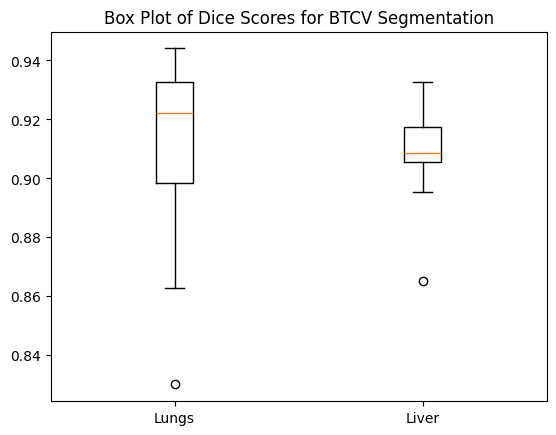

In [633]:
dices = [dice_lungs, dice_liver]
plt.boxplot(dices)
plt.title("Box Plot of Dice Scores for BTCV Segmentation")
plt.xticks([1, 2], ['Lungs', 'Liver'])
plt.show()

/tmp/ipykernel_11990/1304554512.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax[0], x = 'Target', y = 'Dice Score', data = df_dice, errorbar = 'sd', edgecolor='dimgray', errcolor='dimgray', linewidth=1.5, width=0.4, palette = 'YlGnBu_r')
/tmp/ipykernel_11990/1304554512.py:7: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': 'dimgray'}` instead.

  sns.barplot(ax=ax[0], x = 'Target', y = 'Dice Score', data = df_dice, errorbar = 'sd', edgecolor='dimgray', errcolor='dimgray', linewidth=1.5, width=0.4, palette = 'YlGnBu_r')
/tmp/ipykernel_11990/1304554512.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax[1], x = '

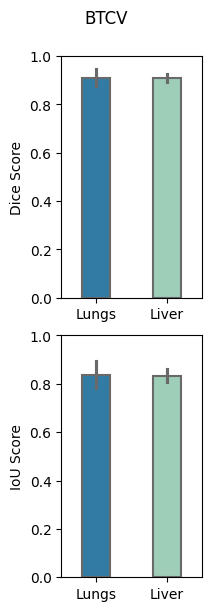

In [634]:
fig, ax = plt.subplots(2,1, figsize=(2,6), constrained_layout=True)
data_tuples = [('Lungs', i) for i in dice_lungs] + [('Liver', j) for j in dice_liver]
df_dice = pd.DataFrame(data_tuples, columns = ['Target', 'Dice Score'])
data_tuples_i = [('Lungs', i) for i in iou_lungs] + [('Liver', j) for j in iou_liver]
df_iou = pd.DataFrame(data_tuples_i, columns = ['Target', 'IoU Score'])
# palette = sns.cubehelix_palette(5, start = 0.1, rot = -0.8, dark = 0.2, light = 0.6, hue = 1, gamma = 2, reverse = False, as_cmap = False)
sns.barplot(ax=ax[0], x = 'Target', y = 'Dice Score', data = df_dice, errorbar = 'sd', edgecolor='dimgray', errcolor='dimgray', linewidth=1.5, width=0.4, palette = 'YlGnBu_r')
sns.barplot(ax=ax[1], x = 'Target', y = 'IoU Score', data = df_iou, errorbar = 'sd', edgecolor='dimgray', errcolor='dimgray', linewidth=1.5, width=0.4, palette = 'YlGnBu_r')

ax[0].set_ylim(0,1)
# ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].set_title(' ', fontsize = 11)

ax[1].set_ylim(0,1)
# ax[1].set_ylabel('')
ax[1].set_xlabel('')
# ax[1].set_title('IoU Score', fontsize = 11)
fig.suptitle('BTCV')
plt.savefig('BTCV_accuracy_barplot.png', format='png', dpi=500)

In [ ]:
f, ax = plt.subplots(1,2, figsize=(3,3), constrained_layout = True)
sns.catplot(x = 'Target', y = 'Dice Score', kind = 'bar', data = df, errorbar = 'sd', palette = palette)


In [642]:
np.mean(iou_liver)

0.8341979442824995

In [643]:
np.std(iou_liver)

0.02544164539451007

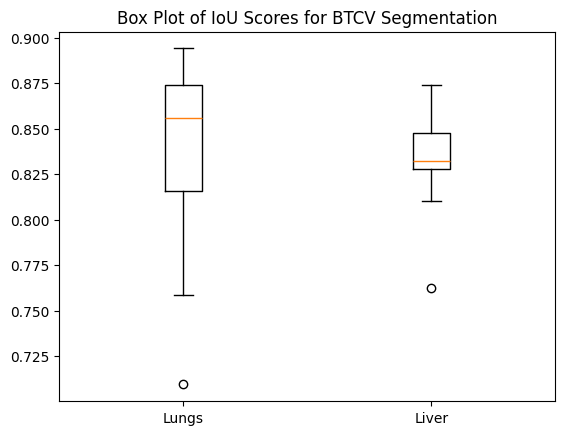

In [92]:
ious = [iou_lungs, iou_liver]
plt.boxplot(ious)
plt.title("Box Plot of IoU Scores for BTCV Segmentation")
plt.xticks([1, 2], ['Lungs', 'Liver'])
plt.show()

In [ ]:
# plot dice scores for lungs
# dice_lung_mean = np.mean(dice_lung)
# dice_lung_std = np.std(dice_lung)
# iou_lung_mean = np.mean(iou_lung)
# iou_lung_std = np.std(iou_lung)

# # plot dice score for lungs
# plt.plot(dice_lung, 'o', label = 'Data points')
# plt.axhline(y = dice_lung_mean, color = 'r', linestyle = '-')
# plt.axhline(y = dice_lung_mean - dice_lung_std, color = 'g', linestyle = '--')
# plt.axhline(y = dice_lung_mean + dice_lung_std, color = 'g', linestyle = '--')
# plt.title("Dice Score for Lungs")
# plt.show()

In [ ]:

# # plot IoU score for lungs
# plt.plot(iou_lung, 'o', label = 'Data points')
# plt.axhline(y = iou_lung_mean, color = 'r', linestyle = '-')
# plt.axhline(y = iou_lung_mean - iou_lung_std, color = 'g', linestyle = '--')
# plt.axhline(y = iou_lung_mean + iou_lung_std, color = 'g', linestyle = '--')
# plt.title("IoU Score for Lungs")
# plt.show()

In [ ]:
mask3 = utils.padtocube(utils.load_mrc('outputs/vol_14_kidneys_mask.mrc'))
label3 = utils.padtocube(utils.load3dmatrix('images/label_14'))
plt.imshow(mask3[:,160,:])

In [ ]:
plt.imshow(np.where(np.abs(label3-205) < 2, 1, 0)[:,160,:])

# BRaTS Data Quantification

In [166]:
# BRaTS Data
mask = utils.padtocube(utils.load_mrc('outputs/brats2021_00204_flair_tr_mask.mrc'))
label = utils.padtocube(utils.load3dmatrix('images/BraTS2021_00204_seg'))

In [106]:
# tumor region label
label_tr = np.where(label>0, 1, 0)
# tumor label
label_t = np.where(np.where(label == 51, 1, 0) + np.where(label == 205, 1, 0), 1,0)

In [292]:
flair_t_dice = []
flair_tr_dice = []
t1ce_t_dice = []
t1ce_tr_dice = []
t2_t_dice = []
t2_tr_dice = []
t1_t_dice = []
t1_tr_dice = []

flair_t_iou = []
flair_tr_iou = []
t1ce_t_iou = []
t1ce_tr_iou = []
t2_t_iou = []
t2_tr_iou = []
t1_t_iou = []
t1_tr_iou = []

image_list = ['00201', '00204', '00207', '00209', '00210', '00211', '00216', '00217']
categories = ['flair', 't1ce', 't2', 't1']
regions = ['tr', 'tumor']

for im in image_list:
    for c in categories:
        for region in regions: 
            mask = utils.padtocube(utils.load_mrc('outputs/brats2021_%s_%s_%s_mask.mrc' %(im, c, region)))
            label = utils.padtocube(utils.load3dmatrix('images/BraTS2021_%s_seg' % im))
            # tumor region
            if region == 'tr':
                label_tr =  np.where(label > 0, 1, 0)
                dice_s_tr = dice_score(mask, label_tr)
                iou_s_tr = iou_score(mask, label_tr)

                if c == 'flair':
                    flair_tr_dice.append(dice_s_tr)
                    flair_tr_iou.append(iou_s_tr)
                elif c == 't1ce':
                    t1ce_tr_dice.append(dice_s_tr)
                    t1ce_tr_iou.append(iou_s_tr)
                elif c == 't2':
                    t2_tr_dice.append(dice_s_tr)
                    t2_tr_iou.append(iou_s_tr)
                else: 
                    t1_tr_dice.append(dice_s_tr)
                    t1_tr_iou.append(iou_s_tr)

            # tumor region13
            else:
                if c == 'flair':
                    flair_t_dice.append(dice_s_t)
                    flair_t_iou.append(iou_s_t)
                elif c == 't1ce':
                    t1ce_t_dice.append(dice_s_t)
                    t1ce_t_iou.append(iou_s_t)
                elif c == 't2':
                    t2_t_dice.append(dice_s_t)
                    t2_t_iou.append(iou_s_t)
                else: 
                    t1_t_dice.append(dice_s_t)
                    t1_t_iou.append(iou_s_t)
              

In [295]:
# subplot 1 data: four contrasts, tumor, dice score
data_t_dice = [('flair', i) for i in flair_t_dice] + [('t1ce', j) for j in t1ce_t_dice] + [('t2', k) for k in t2_t_dice] + [('t1', v) for v in t1_t_dice]
df_t_dice = pd.DataFrame(data_t_dice, columns = ['Contrast', 'Dice Score'])

# subplot 2 data: four contrasts, tumor, iou score
data_t_iou = [('flair', i) for i in flair_t_iou] + [('t1ce', j) for j in t1ce_t_iou] + [('t2', k) for k in t2_t_iou] + [('t1', v) for v in t1_t_iou]
df_t_iou = pd.DataFrame(data_t_iou, columns = ['Contrast', 'IoU Score'])

# subplot 3 data: four contrasts, tumor region, dice score
data_tr_dice = [('flair', i) for i in flair_tr_dice] + [('t1ce', j) for j in t1ce_tr_dice] + [('t2', k) for k in t2_tr_dice] + [('t1', v) for v in t1_tr_dice]
df_tr_dice = pd.DataFrame(data_tr_dice, columns = ['Contrast', 'Dice Score'])

# subplot 4 data: four contrasts, tumor region, iou score
data_tr_iou = [('flair', i) for i in flair_tr_iou] + [('t1ce', j) for j in t1ce_tr_iou] + [('t2', k) for k in t2_tr_iou] + [('t1', v) for v in t1_tr_iou]
df_tr_iou = pd.DataFrame(data_tr_iou, columns = ['Contrast', 'IoU Score'])


/tmp/ipykernel_11990/2136964661.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax[0][0], x = 'Contrast', y = 'Dice Score', data = df_t_dice, errorbar = 'sd', edgecolor='dimgray', errcolor='dimgray', linewidth=1.5, width=0.4, palette = 'YlGnBu_r')
/tmp/ipykernel_11990/2136964661.py:2: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': 'dimgray'}` instead.

  sns.barplot(ax=ax[0][0], x = 'Contrast', y = 'Dice Score', data = df_t_dice, errorbar = 'sd', edgecolor='dimgray', errcolor='dimgray', linewidth=1.5, width=0.4, palette = 'YlGnBu_r')
/tmp/ipykernel_11990/2136964661.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(a

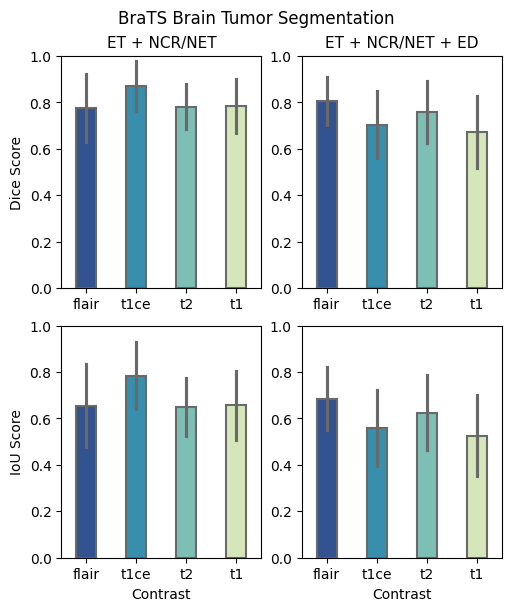

In [339]:
fig, ax = plt.subplots(2,2, figsize=(5, 6), constrained_layout=True)
sns.barplot(ax=ax[0][0], x = 'Contrast', y = 'Dice Score', data = df_t_dice, errorbar = 'sd', edgecolor='dimgray', errcolor='dimgray', linewidth=1.5, width=0.4, palette = 'YlGnBu_r')
sns.barplot(ax=ax[1][0], x = 'Contrast', y = 'IoU Score', data = df_t_iou, errorbar = 'sd', edgecolor='dimgray', errcolor='dimgray', linewidth=1.5, width=0.4, palette = 'YlGnBu_r')
sns.barplot(ax=ax[0][1], x = 'Contrast', y = 'Dice Score', data = df_tr_dice, errorbar = 'sd', edgecolor='dimgray', errcolor='dimgray', linewidth=1.5, width=0.4, palette = 'YlGnBu_r')
sns.barplot(ax=ax[1][1], x = 'Contrast', y = 'IoU Score', data = df_tr_iou, errorbar = 'sd', edgecolor='dimgray', errcolor='dimgray', linewidth=1.5, width=0.4, palette = 'YlGnBu_r')

fig.suptitle('BraTS Brain Tumor Segmentation')
ax[0][0].set_ylim(0,1)
ax[0][0].set_ylabel('Dice Score')
ax[0][0].set_xlabel('')
ax[0][0].set_title('ET + NCR/NET', fontsize = 11)

ax[0][1].set_ylim(0,1)
ax[0][1].set_ylabel('')
ax[0][1].set_xlabel('')
ax[0][1].set_title('ET + NCR/NET + ED', fontsize = 11)

ax[1][0].set_ylim(0,1)
ax[1][0].set_ylabel('IoU Score')
ax[1][0].set_xlabel('Contrast')
# ax[1][0].set_title('IoU Score for Tumor', fontsize = 11)

ax[1][1].set_ylim(0,1)
ax[1][1].set_ylabel('')
ax[1][1].set_xlabel('Contrast')
# ax[1][1].set_title('IoU Score for Tumor Region', fontsize = 11)

plt.savefig('BraTS_accuracy_barplot.png', format='png', dpi=500)

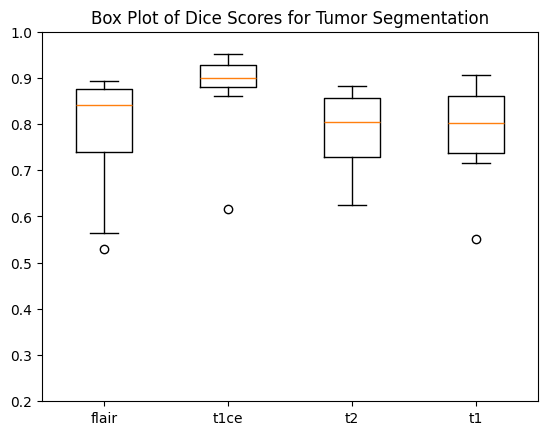

In [177]:
dices_t = [flair_t_dice, t1ce_t_dice, t2_t_dice, t1_t_dice]

plt.boxplot(dices_t)tensor([[[[1.0991e-03, 9.7451e-04, 4.2896e-04,  ..., 4.6578e-04,
           3.0100e-04, 4.4740e-04],
          [3.3943e-03, 3.2550e-04, 6.6873e-04,  ..., 1.3322e-04,
           3.1074e-04, 8.5023e-06],
          [1.0660e-03, 1.0706e-04, 4.7776e-04,  ..., 4.8503e-05,
           7.0832e-06, 1.9279e-04],
          ...,
          [2.1516e-03, 3.3429e-04, 9.2588e-04,  ..., 2.2128e-04,
           5.9529e-04, 7.1134e-05],
          [1.0973e-03, 4.6413e-04, 2.8692e-04,  ..., 6.5015e-05,
           8.4852e-05, 3.2377e-06],
          [6.7863e-04, 8.9912e-05, 9.3896e-06,  ..., 2.2811e-04,
           6.2894e-04, 1.4738e-04]],

         [[5.5141e-04, 2.9127e-04, 1.5341e-04,  ..., 8.6759e-05,
           7.7538e-04, 4.6563e-04],
          [2.3423e-03, 6.6792e-04, 5.5714e-04,  ..., 1.0070e-03,
           4.4242e-04, 4.8619e-04],
          [1.5489e-03, 1.7255e-04, 5.7379e-04,  ..., 7.2035e-04,
           1.0677e-04, 2.1277e-04],
          ...,
          [2.3673e-03, 6.5748e-04, 7.2327e-04,  ..., 8.4170e-05,
           1.4893e-04, 2.0652e-04],
          [3.7636e-03, 1.5553e-04, 3.4192e-05,  ..., 1.9407e-04,
           2.3152e-04, 5.0354e-06],
          [5.1652e-08, 4.2613e-04, 2.7607e-04,  ..., 4.7480e-04,
           9.9959e-04, 3.1637e-04]],

         [[2.4846e-03, 1.3148e-03, 8.1370e-04,  ..., 2.0194e-03,
           2.2386e-03, 6.0245e-04],
          [2.2588e-03, 1.8950e-05, 3.2479e-04,  ..., 1.6965e-04,
           6.8480e-05, 5.1126e-04],
          [1.5169e-03, 1.6054e-05, 3.0542e-04,  ..., 6.2800e-04,
           7.2712e-05, 3.0405e-05],
          ...,
          [9.7057e-04, 1.8539e-03, 5.5633e-04,  ..., 5.9025e-04,
           1.6249e-03, 5.4117e-04],
          [4.0722e-03, 1.3260e-04, 1.4269e-07,  ..., 6.3596e-04,
           8.7725e-05, 5.6710e-04],
          [1.3427e-03, 6.1164e-04, 4.5774e-06,  ..., 8.4837e-04,
           6.4057e-03, 9.5875e-04]]],


        [[[3.8341e-03, 6.8523e-04, 1.9710e-04,  ..., 5.8589e-07,
           3.5330e-04, 7.5288e-05],
          [8.2383e-04, 1.1727e-05, 1.9240e-05,  ..., 1.1728e-04,
           5.2988e-04, 6.0410e-05],
          [1.4846e-04, 6.4116e-07, 9.0783e-07,  ..., 8.2174e-06,
           9.0630e-06, 7.8518e-08],
          ...,
          [3.6455e-05, 5.1946e-05, 1.6675e-04,  ..., 2.4549e-04,
           3.5103e-05, 2.1567e-05],
          [1.8724e-05, 6.7303e-05, 1.0339e-04,  ..., 3.5688e-04,
           5.2895e-05, 6.5360e-06],
          [3.4542e-07, 2.7848e-05, 1.8337e-05,  ..., 3.0915e-04,
           1.3457e-03, 1.0467e-04]],

         [[1.6069e-03, 2.6386e-04, 3.6004e-05,  ..., 1.9642e-04,
           2.2460e-05, 1.5821e-06],
          [7.9441e-04, 4.0471e-05, 3.3752e-05,  ..., 5.7801e-04,
           9.8601e-06, 5.0529e-04],
          [1.2674e-04, 1.9525e-05, 3.3372e-05,  ..., 4.6130e-04,
           2.3901e-06, 9.3989e-05],
          ...,
          [3.5788e-04, 4.5816e-05, 1.5970e-05,  ..., 2.0146e-04,
           1.6969e-04, 5.3794e-05],
          [6.4403e-04, 1.4615e-07, 1.3699e-06,  ..., 6.7310e-05,
           5.8921e-06, 1.2756e-04],
          [4.3591e-05, 1.0170e-05, 8.5157e-05,  ..., 6.8685e-04,
           8.4994e-04, 4.7289e-05]],

         [[1.6579e-03, 3.9382e-04, 8.5172e-05,  ..., 1.5434e-04,
           1.3337e-06, 2.5260e-05],
          [6.7161e-04, 8.2210e-06, 6.5456e-06,  ..., 2.3484e-04,
           2.9293e-04, 6.2471e-05],
          [1.3450e-04, 3.5154e-06, 5.7475e-05,  ..., 5.1154e-04,
           7.2109e-04, 1.7217e-05],
          ...,
          [1.4920e-03, 3.5511e-04, 1.2743e-04,  ..., 1.1279e-04,
           6.9380e-05, 2.0492e-04],
          [1.6431e-03, 8.0434e-04, 5.9964e-04,  ..., 3.4824e-04,
           4.0350e-04, 5.7820e-07],
          [1.2157e-03, 2.6100e-04, 2.7855e-05,  ..., 1.7715e-03,
           1.0615e-03, 7.8619e-04]]],


        [[[1.4014e-03, 2.1266e-03, 1.4942e-03,  ..., 1.5059e-04,
           3.0458e-04, 2.5619e-04],
          [3.4898e-03, 2.8347e-04, 6.5012e-04,  ..., 3.9870e-05,
           4.1599e-04, 6.1541e-04],
          [4.9527e-04, 2.0790e-05, 8.8808e-05,  ..., 8.1244e-05,tensor([[[[1.0991e-03, 9.7451e-04, 4.2896e-04,  ..., 4.6578e-04,
           3.0100e-04, 4.4740e-04],
          [3.3943e-03, 3.2550e-04, 6.6873e-04,  ..., 1.3322e-04,
           3.1074e-04, 8.5023e-06],
          [1.0660e-03, 1.0706e-04, 4.7776e-04,  ..., 4.8503e-05,
           7.0832e-06, 1.9279e-04],
          ...,
          [2.1516e-03, 3.3429e-04, 9.2588e-04,  ..., 2.2128e-04,
           5.9529e-04, 7.1134e-05],
          [1.0973e-03, 4.6413e-04, 2.8692e-04,  ..., 6.5015e-05,
           8.4852e-05, 3.2377e-06],
          [6.7863e-04, 8.9912e-05, 9.3896e-06,  ..., 2.2811e-04,
           6.2894e-04, 1.4738e-04]],

         [[5.5141e-04, 2.9127e-04, 1.5341e-04,  ..., 8.6759e-05,
           7.7538e-04, 4.6563e-04],
          [2.3423e-03, 6.6792e-04, 5.5714e-04,  ..., 1.0070e-03,
           4.4242e-04, 4.8619e-04],
          [1.5489e-03, 1.7255e-04, 5.7379e-04,  ..., 7.2035e-04,
           1.0677e-04, 2.1277e-04],
          ...,
          [2.3673e-03, 6.5748e-04, 7.2327e-04,  ..., 8.4170e-05,
           1.4893e-04, 2.0652e-04],
          [3.7636e-03, 1.5553e-04, 3.4192e-05,  ..., 1.9407e-04,
           2.3152e-04, 5.0354e-06],
          [5.1652e-08, 4.2613e-04, 2.7607e-04,  ..., 4.7480e-04,
           9.9959e-04, 3.1637e-04]],

         [[2.4846e-03, 1.3148e-03, 8.1370e-04,  ..., 2.0194e-03,
           2.2386e-03, 6.0245e-04],
          [2.2588e-03, 1.8950e-05, 3.2479e-04,  ..., 1.6965e-04,
           6.8480e-05, 5.1126e-04],
          [1.5169e-03, 1.6054e-05, 3.0542e-04,  ..., 6.2800e-04,
           7.2712e-05, 3.0405e-05],
          ...,
          [9.7057e-04, 1.8539e-03, 5.5633e-04,  ..., 5.9025e-04,
           1.6249e-03, 5.4117e-04],
          [4.0722e-03, 1.3260e-04, 1.4269e-07,  ..., 6.3596e-04,
           8.7725e-05, 5.6710e-04],
          [1.3427e-03, 6.1164e-04, 4.5774e-06,  ..., 8.4837e-04,
           6.4057e-03, 9.5875e-04]]],


        [[[3.8341e-03, 6.8523e-04, 1.9710e-04,  ..., 5.8589e-07,
           3.5330e-04, 7.5288e-05],
          [8.2383e-04, 1.1727e-05, 1.9240e-05,  ..., 1.1728e-04,
           5.2988e-04, 6.0410e-05],
          [1.4846e-04, 6.4116e-07, 9.0783e-07,  ..., 8.2174e-06,
           9.0630e-06, 7.8518e-08],
          ...,
          [3.6455e-05, 5.1946e-05, 1.6675e-04,  ..., 2.4549e-04,
           3.5103e-05, 2.1567e-05],
          [1.8724e-05, 6.7303e-05, 1.0339e-04,  ..., 3.5688e-04,
           5.2895e-05, 6.5360e-06],
          [3.4542e-07, 2.7848e-05, 1.8337e-05,  ..., 3.0915e-04,
           1.3457e-03, 1.0467e-04]],

         [[1.6069e-03, 2.6386e-04, 3.6004e-05,  ..., 1.9642e-04,
           2.2460e-05, 1.5821e-06],
          [7.9441e-04, 4.0471e-05, 3.3752e-05,  ..., 5.7801e-04,
           9.8601e-06, 5.0529e-04],
          [1.2674e-04, 1.9525e-05, 3.3372e-05,  ..., 4.6130e-04,
           2.3901e-06, 9.3989e-05],
          ...,
          [3.5788e-04, 4.5816e-05, 1.5970e-05,  ..., 2.0146e-04,
           1.6969e-04, 5.3794e-05],
          [6.4403e-04, 1.4615e-07, 1.3699e-06,  ..., 6.7310e-05,
           5.8921e-06, 1.2756e-04],
          [4.3591e-05, 1.0170e-05, 8.5157e-05,  ..., 6.8685e-04,
           8.4994e-04, 4.7289e-05]],

         [[1.6579e-03, 3.9382e-04, 8.5172e-05,  ..., 1.5434e-04,
           1.3337e-06, 2.5260e-05],
          [6.7161e-04, 8.2210e-06, 6.5456e-06,  ..., 2.3484e-04,
           2.9293e-04, 6.2471e-05],
          [1.3450e-04, 3.5154e-06, 5.7475e-05,  ..., 5.1154e-04,
           7.2109e-04, 1.7217e-05],
          ...,
          [1.4920e-03, 3.5511e-04, 1.2743e-04,  ..., 1.1279e-04,
           6.9380e-05, 2.0492e-04],
          [1.6431e-03, 8.0434e-04, 5.9964e-04,  ..., 3.4824e-04,
           4.0350e-04, 5.7820e-07],
          [1.2157e-03, 2.6100e-04, 2.7855e-05,  ..., 1.7715e-03,
           1.0615e-03, 7.8619e-04]]],


        [[[1.4014e-03, 2.1266e-03, 1.4942e-03,  ..., 1.5059e-04,
           3.0458e-04, 2.5619e-04],
          [3.4898e-03, 2.8347e-04, 6.5012e-04,  ..., 3.9870e-05,
           4.1599e-04, 6.1541e-04],
          [4.9527e-04, 2.0790e-05, 8.8808e-05,  ..., 8.1244e-05,
           7.1026e-04, 5.9849e-04],
          ...,
          [4.2465e-04, 7.2703e-04, 7.0434e-04,  ..., 1.6559e-04,
           1.8614e-04, 7.7299e-05],
          [1.3670e-03, 1.1262e-04, 3.6389e-04,  ..., 1.0973e-05,
           1.0998e-05, 1.0925e-03],
          [2.3675e-05, 1.4418e-03, 1.8721e-03,  ..., 1.2738e-06,
           5.4671e-05, 1.5684e-05]],

         [[1.5692e-03, 1.0143e-03, 7.2522e-04,  ..., 1.6059e-04,
           6.1702e-04, 4.4347e-05],
          [1.7624e-03, 3.1046e-05, 6.1430e-04,  ..., 8.3458e-04,
           4.4941e-04, 1.3549e-04],
          [5.6114e-04, 3.5387e-04, 4.4793e-04,  ..., 4.9943e-04,
           2.9470e-04, 6.2601e-05],
          ...,
          [1.6058e-03, 1.3251e-03, 1.6096e-03,  ..., 9.2061e-04,
           5.1436e-04, 3.1227e-04],
          [1.7324e-03, 4.2932e-04, 8.8144e-04,  ..., 1.2288e-04,
           1.0641e-04, 5.9415e-04],
          [1.2455e-04, 8.6683e-04, 9.2366e-04,  ..., 3.4312e-06,
           2.9635e-04, 4.7653e-05]],

         [[4.7174e-04, 6.3257e-04, 4.9151e-04,  ..., 1.0504e-05,
           2.5318e-04, 3.9362e-04],
          [1.0565e-03, 2.4025e-04, 3.5764e-05,  ..., 1.0857e-04,
           7.3972e-05, 1.7049e-04],
          [1.8405e-04, 4.2082e-05, 6.6234e-05,  ..., 3.8175e-06,
           1.3013e-05, 4.7384e-05],
          ...,
          [3.8181e-04, 2.6197e-04, 6.9066e-04,  ..., 2.7068e-04,
           2.3139e-05, 1.4646e-04],
          [1.3179e-03, 1.0332e-04, 2.6410e-04,  ..., 2.7413e-04,
           8.8928e-05, 5.7266e-05],
          [5.1615e-04, 1.2920e-03, 7.0086e-04,  ..., 2.5797e-05,
           2.1583e-04, 3.8158e-04]]],


        ...,


        [[[4.1752e-03, 6.8241e-03, 3.2146e-03,  ..., 4.8152e-04,
           1.4245e-03, 3.4390e-03],
          [7.1458e-03, 5.6817e-03, 5.2660e-03,  ..., 1.4429e-03,
           2.5559e-03, 4.5512e-03],
          [4.4152e-03, 2.0145e-04, 2.2515e-03,  ..., 1.1426e-04,
           2.0353e-03, 3.5725e-03],
          ...,
          [1.8614e-03, 1.2849e-03, 1.9895e-04,  ..., 2.4290e-04,
           2.2494e-03, 1.3023e-03],
          [1.2826e-03, 3.3439e-05, 9.3544e-05,  ..., 3.4821e-03,
           1.6866e-03, 4.3606e-04],
          [1.2336e-02, 7.6902e-03, 5.7210e-03,  ..., 1.7921e-04,
           2.2259e-03, 1.0759e-03]],

         [[5.5115e-04, 4.0542e-05, 2.1809e-03,  ..., 5.7123e-04,
           1.4368e-04, 4.0244e-03],
          [5.1647e-04, 5.1485e-05, 1.4559e-03,  ..., 1.0596e-05,
           5.7487e-04, 1.6563e-03],
          [4.5930e-03, 1.5374e-07, 3.1027e-04,  ..., 4.1991e-04,
           9.5111e-04, 4.4585e-03],
          ...,
          [1.9205e-03, 1.4773e-04, 1.2817e-05,  ..., 4.8009e-05,
           3.2748e-07, 1.3948e-03],
          [1.9818e-03, 2.0784e-04, 2.6026e-03,  ..., 1.2264e-06,
           9.0080e-04, 1.4129e-06],
          [2.1025e-03, 6.5938e-03, 4.6172e-03,  ..., 1.6483e-04,
           2.7218e-03, 4.3953e-04]],

         [[1.8583e-03, 2.0913e-03, 1.7454e-06,  ..., 6.8978e-06,
           2.2645e-04, 1.7267e-03],
          [4.4213e-06, 7.0040e-04, 1.5714e-03,  ..., 1.1742e-03,
           1.5138e-03, 8.4510e-03],
          [4.0109e-04, 1.9124e-03, 1.6495e-03,  ..., 4.2085e-04,
           2.0355e-03, 4.0581e-03],
          ...,
          [2.1341e-03, 2.8457e-04, 8.3301e-04,  ..., 3.7953e-06,
           5.5950e-07, 4.0113e-03],
          [5.1527e-04, 8.4251e-04, 1.5649e-03,  ..., 1.4865e-03,
           1.1550e-03, 1.3084e-05],
          [1.3814e-02, 5.2027e-03, 1.5084e-02,  ..., 6.7754e-04,
           5.6347e-05, 3.1183e-04]]],


        [[[2.4070e-01, 2.9104e-02, 1.9337e-02,  ..., 1.3406e-01,
           2.2391e-01, 1.6419e-01],
          [1.6589e-01, 4.8658e-02, 5.2193e-02,  ..., 3.0187e-02,
           1.4413e-01, 1.1759e-03],
          [5.6112e-02, 5.7868e-03, 9.8420e-03,  ..., 9.6956e-04,
           1.0369e-03, 2.4935e-02],
          ...,
          [1.1652e-01, 2.6053e-02, 1.4258e-02,  ..., 1.5877e-02,
           1.0979e-02, 8.7095e-03],
          [2.1248e-01, 4.6741e-02, 1.0308e-02,  ..., 3.1381e-03,
           1.6913e-02, 4.0534e-02],
          [1.5721e-01, 3.0831e-02, 5.0590e-03,  ..., 5.5391e-03,
           6.5251e-03, 3.1532e-02]],

         [[5.5524e-03, 1.3125e-04, 2.6696e-05,  ..., 1.2519e-02,
           9.2553e-03, 4.1995e-03],
          [9.0909e-02, 2.0325e-02, 4.3703e-03,  ..., 5.4753e-03,
           1.1229e-02, 6.0715e-04],
          [2.3795e-02, 7.9525e-05, 3.0683e-04,  ..., 5.9172e-03,
           6.7486e-03, 9.7049e-04],
          ...,
          [6.6540e-02, 1.1300e-04, 2.1575e-03,  ..., 1.1834e-04,
           3.5956e-04, 2.6398e-02],
          [7.3944e-02, 8.2784e-03, 8.7934e-07,  ..., 1.6829e-06,
           2.9832e-06, 6.5012e-02],
          [1.6166e-01, 8.4683e-03, 5.2969e-03,  ..., 2.9840e-03,
           6.3562e-05, 6.9251e-03]],

         [[2.0690e-02, 1.5482e-02, 3.6569e-02,  ..., 4.7433e-02,
           3.6646e-02, 5.9212e-02],
          [1.0224e-02, 2.1289e-02, 5.4337e-03,  ..., 9.2339e-03,
           1.2553e-03, 2.2748e-03],
          [1.3945e-04, 5.0148e-03, 5.5325e-03,  ..., 2.7857e-03,
           3.4139e-04, 5.7845e-03],
          ...,
          [1.8200e-02, 5.9624e-02, 9.3282e-03,  ..., 3.8618e-04,
           2.0514e-03, 2.0014e-03],
          [6.4491e-02, 4.7746e-02, 1.2160e-02,  ..., 6.7974e-03,
           7.9156e-03, 4.0458e-03],
          [5.0570e-02, 2.3233e-02, 4.9687e-04,  ..., 3.3823e-03,
           6.1807e-03, 2.8397e-02]]],


        [[[1.0664e-03, 1.0844e-05, 3.2112e-04,  ..., 5.1352e-06,
           2.0070e-04, 4.9668e-03],
          [2.2660e-04, 2.0637e-04, 1.0208e-04,  ..., 1.2613e-04,
           6.2660e-05, 1.9349e-04],
          [2.3670e-04, 1.6244e-05, 4.3172e-06,  ..., 1.3891e-07,
           7.0608e-05, 1.7774e-04],
          ...,
          [1.7957e-03, 1.5713e-04, 4.3608e-05,  ..., 4.9015e-04,
           9.6600e-04, 6.3463e-04],
          [1.0679e-08, 1.5704e-04, 1.2262e-04,  ..., 1.2442e-03,
           2.8814e-03, 4.0433e-04],
          [3.5216e-03, 6.7537e-05, 1.7159e-05,  ..., 3.8760e-04,
           2.6214e-04, 2.6126e-03]],

         [[2.8771e-04, 3.8411e-06, 6.4124e-05,  ..., 6.7598e-04,
           1.1042e-05, 2.9013e-03],
          [4.8789e-04, 1.3754e-04, 1.5691e-04,  ..., 5.5469e-04,
           2.6180e-04, 1.2352e-05],
          [6.6164e-04, 3.4818e-08, 1.8625e-04,  ..., 2.9517e-04,
           1.4458e-04, 8.5183e-07],
          ...,
          [1.7328e-03, 2.6964e-04, 1.4338e-04,  ..., 2.2135e-04,
           9.4282e-04, 7.6778e-04],
          [1.2801e-04, 1.6277e-04, 2.8367e-05,  ..., 6.4491e-04,
           2.8930e-03, 7.1797e-04],
          [1.2818e-03, 1.9465e-04, 1.2683e-04,  ..., 1.6514e-04,
           2.6918e-04, 1.3989e-03]],

         [[6.9367e-04, 8.4034e-05, 4.3469e-04,  ..., 3.7908e-04,
           9.3031e-05, 3.2684e-03],
          [4.0159e-04, 2.2487e-04, 9.4018e-06,  ..., 1.5328e-04,
           3.4905e-04, 1.2450e-05],
          [3.8193e-04, 1.2367e-04, 7.8341e-08,  ..., 3.9921e-05,
           7.9941e-05, 7.0480e-05],
          ...,
          [1.9452e-03, 1.3341e-04, 7.9539e-05,  ..., 3.5555e-04,
           1.2661e-03, 8.0926e-04],
          [1.1693e-04, 4.6538e-04, 4.9342e-04,  ..., 7.0342e-04,
           3.1587e-03, 6.8563e-04],
          [1.5507e-03, 8.6918e-05, 9.2899e-07,  ..., 1.8492e-04,
           3.7582e-05, 1.8870e-03]]]], device='cuda:0')
           7.1026e-04, 5.9849e-04],
          ...,
          [4.2465e-04, 7.2703e-04, 7.0434e-04,  ..., 1.6559e-04,
           1.8614e-04, 7.7299e-05],
          [1.3670e-03, 1.1262e-04, 3.6389e-04,  ..., 1.0973e-05,
           1.0998e-05, 1.0925e-03],
          [2.3675e-05, 1.4418e-03, 1.8721e-03,  ..., 1.2738e-06,
           5.4671e-05, 1.5684e-05]],

         [[1.5692e-03, 1.0143e-03, 7.2522e-04,  ..., 1.6059e-04,
           6.1702e-04, 4.4347e-05],
          [1.7624e-03, 3.1046e-05, 6.1430e-04,  ..., 8.3458e-04,
           4.4941e-04, 1.3549e-04],
          [5.6114e-04, 3.5387e-04, 4.4793e-04,  ..., 4.9943e-04,
           2.9470e-04, 6.2601e-05],
          ...,
          [1.6058e-03, 1.3251e-03, 1.6096e-03,  ..., 9.2061e-04,
           5.1436e-04, 3.1227e-04],
          [1.7324e-03, 4.2932e-04, 8.8144e-04,  ..., 1.2288e-04,
           1.0641e-04, 5.9415e-04],
          [1.2455e-04, 8.6683e-04, 9.2366e-04,  ..., 3.4312e-06,
           2.9635e-04, 4.7653e-05]],

         [[4.7174e-04, 6.3257e-04, 4.9151e-04,  ..., 1.0504e-05,
           2.5318e-04, 3.9362e-04],
          [1.0565e-03, 2.4025e-04, 3.5764e-05,  ..., 1.0857e-04,
           7.3972e-05, 1.7049e-04],
          [1.8405e-04, 4.2082e-05, 6.6234e-05,  ..., 3.8175e-06,
           1.3013e-05, 4.7384e-05],
          ...,
          [3.8181e-04, 2.6197e-04, 6.9066e-04,  ..., 2.7068e-04,
           2.3139e-05, 1.4646e-04],
          [1.3179e-03, 1.0332e-04, 2.6410e-04,  ..., 2.7413e-04,
           8.8928e-05, 5.7266e-05],
          [5.1615e-04, 1.2920e-03, 7.0086e-04,  ..., 2.5797e-05,
           2.1583e-04, 3.8158e-04]]],


        ...,


        [[[4.1752e-03, 6.8241e-03, 3.2146e-03,  ..., 4.8152e-04,
           1.4245e-03, 3.4390e-03],
          [7.1458e-03, 5.6817e-03, 5.2660e-03,  ..., 1.4429e-03,
           2.5559e-03, 4.5512e-03],
          [4.4152e-03, 2.0145e-04, 2.2515e-03,  ..., 1.1426e-04,
           2.0353e-03, 3.5725e-03],
          ...,
          [1.8614e-03, 1.2849e-03, 1.9895e-04,  ..., 2.4290e-04,
           2.2494e-03, 1.3023e-03],
          [1.2826e-03, 3.3439e-05, 9.3544e-05,  ..., 3.4821e-03,
           1.6866e-03, 4.3606e-04],
          [1.2336e-02, 7.6902e-03, 5.7210e-03,  ..., 1.7921e-04,
           2.2259e-03, 1.0759e-03]],

         [[5.5115e-04, 4.0542e-05, 2.1809e-03,  ..., 5.7123e-04,
           1.4368e-04, 4.0244e-03],
          [5.1647e-04, 5.1485e-05, 1.4559e-03,  ..., 1.0596e-05,
           5.7487e-04, 1.6563e-03],
          [4.5930e-03, 1.5374e-07, 3.1027e-04,  ..., 4.1991e-04,
           9.5111e-04, 4.4585e-03],
          ...,
          [1.9205e-03, 1.4773e-04, 1.2817e-05,  ..., 4.8009e-05,
           3.2748e-07, 1.3948e-03],
          [1.9818e-03, 2.0784e-04, 2.6026e-03,  ..., 1.2264e-06,
           9.0080e-04, 1.4129e-06],
          [2.1025e-03, 6.5938e-03, 4.6172e-03,  ..., 1.6483e-04,
           2.7218e-03, 4.3953e-04]],

         [[1.8583e-03, 2.0913e-03, 1.7454e-06,  ..., 6.8978e-06,
           2.2645e-04, 1.7267e-03],
          [4.4213e-06, 7.0040e-04, 1.5714e-03,  ..., 1.1742e-03,
           1.5138e-03, 8.4510e-03],
          [4.0109e-04, 1.9124e-03, 1.6495e-03,  ..., 4.2085e-04,
           2.0355e-03, 4.0581e-03],
          ...,
          [2.1341e-03, 2.8457e-04, 8.3301e-04,  ..., 3.7953e-06,
           5.5950e-07, 4.0113e-03],
          [5.1527e-04, 8.4251e-04, 1.5649e-03,  ..., 1.4865e-03,
           1.1550e-03, 1.3084e-05],
          [1.3814e-02, 5.2027e-03, 1.5084e-02,  ..., 6.7754e-04,
           5.6347e-05, 3.1183e-04]]],


        [[[2.4070e-01, 2.9104e-02, 1.9337e-02,  ..., 1.3406e-01,
           2.2391e-01, 1.6419e-01],
          [1.6589e-01, 4.8658e-02, 5.2193e-02,  ..., 3.0187e-02,
           1.4413e-01, 1.1759e-03],
          [5.6112e-02, 5.7868e-03, 9.8420e-03,  ..., 9.6956e-04,
           1.0369e-03, 2.4935e-02],
          ...,
          [1.1652e-01, 2.6053e-02, 1.4258e-02,  ..., 1.5877e-02,
           1.0979e-02, 8.7095e-03],
          [2.1248e-01, 4.6741e-02, 1.0308e-02,  ..., 3.1381e-03,
           1.6913e-02, 4.0534e-02],
          [1.5721e-01, 3.0831e-02, 5.0590e-03,  ..., 5.5391e-03,
           6.5251e-03, 3.1532e-02]],

         [[5.5524e-03, 1.3125e-04, 2.6696e-05,  ..., 1.2519e-02,
           9.2553e-03, 4.1995e-03],
          [9.0909e-02, 2.0325e-02, 4.3703e-03,  ..., 5.4753e-03,
           1.1229e-02, 6.0715e-04],
          [2.3795e-02, 7.9525e-05, 3.0683e-04,  ..., 5.9172e-03,
           6.7486e-03, 9.7049e-04],
          ...,
          [6.6540e-02, 1.1300e-04, 2.1575e-03,  ..., 1.1834e-04,
           3.5956e-04, 2.6398e-02],
          [7.3944e-02, 8.2784e-03, 8.7934e-07,  ..., 1.6829e-06,
           2.9832e-06, 6.5012e-02],
          [1.6166e-01, 8.4683e-03, 5.2969e-03,  ..., 2.9840e-03,
           6.3562e-05, 6.9251e-03]],

         [[2.0690e-02, 1.5482e-02, 3.6569e-02,  ..., 4.7433e-02,
           3.6646e-02, 5.9212e-02],
          [1.0224e-02, 2.1289e-02, 5.4337e-03,  ..., 9.2339e-03,
           1.2553e-03, 2.2748e-03],
          [1.3945e-04, 5.0148e-03, 5.5325e-03,  ..., 2.7857e-03,
           3.4139e-04, 5.7845e-03],
          ...,
          [1.8200e-02, 5.9624e-02, 9.3282e-03,  ..., 3.8618e-04,
           2.0514e-03, 2.0014e-03],
          [6.4491e-02, 4.7746e-02, 1.2160e-02,  ..., 6.7974e-03,
           7.9156e-03, 4.0458e-03],
          [5.0570e-02, 2.3233e-02, 4.9687e-04,  ..., 3.3823e-03,
           6.1807e-03, 2.8397e-02]]],


        [[[1.0664e-03, 1.0844e-05, 3.2112e-04,  ..., 5.1352e-06,
           2.0070e-04, 4.9668e-03],
          [2.2660e-04, 2.0637e-04, 1.0208e-04,  ..., 1.2613e-04,
           6.2660e-05, 1.9349e-04],
          [2.3670e-04, 1.6244e-05, 4.3172e-06,  ..., 1.3891e-07,
           7.0608e-05, 1.7774e-04],
          ...,
          [1.7957e-03, 1.5713e-04, 4.3608e-05,  ..., 4.9015e-04,
           9.6600e-04, 6.3463e-04],
          [1.0679e-08, 1.5704e-04, 1.2262e-04,  ..., 1.2442e-03,
           2.8814e-03, 4.0433e-04],
          [3.5216e-03, 6.7537e-05, 1.7159e-05,  ..., 3.8760e-04,
           2.6214e-04, 2.6126e-03]],

         [[2.8771e-04, 3.8411e-06, 6.4124e-05,  ..., 6.7598e-04,
           1.1042e-05, 2.9013e-03],
          [4.8789e-04, 1.3754e-04, 1.5691e-04,  ..., 5.5469e-04,
           2.6180e-04, 1.2352e-05],
          [6.6164e-04, 3.4818e-08, 1.8625e-04,  ..., 2.9517e-04,
           1.4458e-04, 8.5183e-07],
          ...,
          [1.7328e-03, 2.6964e-04, 1.4338e-04,  ..., 2.2135e-04,
           9.4282e-04, 7.6778e-04],
          [1.2801e-04, 1.6277e-04, 2.8367e-05,  ..., 6.4491e-04,
           2.8930e-03, 7.1797e-04],
          [1.2818e-03, 1.9465e-04, 1.2683e-04,  ..., 1.6514e-04,
           2.6918e-04, 1.3989e-03]],

         [[6.9367e-04, 8.4034e-05, 4.3469e-04,  ..., 3.7908e-04,
           9.3031e-05, 3.2684e-03],
          [4.0159e-04, 2.2487e-04, 9.4018e-06,  ..., 1.5328e-04,
           3.4905e-04, 1.2450e-05],
          [3.8193e-04, 1.2367e-04, 7.8341e-08,  ..., 3.9921e-05,
           7.9941e-05, 7.0480e-05],
          ...,
          [1.9452e-03, 1.3341e-04, 7.9539e-05,  ..., 3.5555e-04,
           1.2661e-03, 8.0926e-04],
          [1.1693e-04, 4.6538e-04, 4.9342e-04,  ..., 7.0342e-04,
           3.1587e-03, 6.8563e-04],
          [1.5507e-03, 8.6918e-05, 9.2899e-07,  ..., 1.8492e-04,
           3.7582e-05, 1.8870e-03]]]], device='cuda:0')
plt.title("Box Plot of Dice Scores for Tumor Segmentation")
plt.xticks([1, 2, 3, 4], ['flair', 't1ce', 't2', 't1'])
plt.ylim(0.2, 1.0)
plt.show()

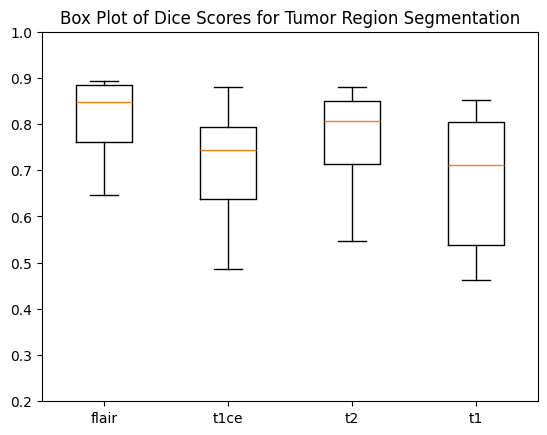

In [176]:
dices_tr = [flair_tr_dice, t1ce_tr_dice, t2_tr_dice, t1_tr_dice]

plt.boxplot(dices_tr)
plt.title("Box Plot of Dice Scores for Tumor Region Segmentation")
plt.xticks([1, 2, 3, 4], ['flair', 't1ce', 't2', 't1'])
plt.ylim(0.2, 1.0)
plt.show()

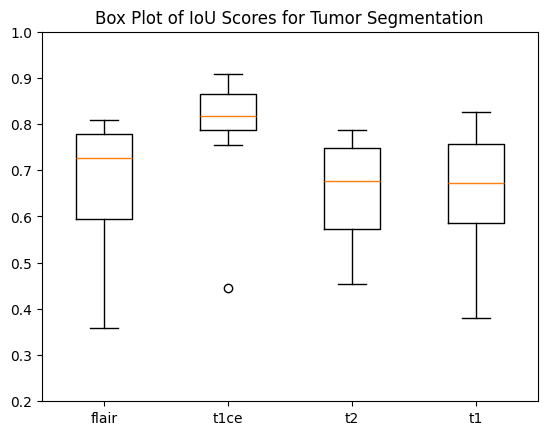

In [175]:
ious_t = [flair_t_iou, t1ce_t_iou, t2_t_iou, t1_t_iou]

plt.boxplot(ious_t)
plt.title("Box Plot of IoU Scores for Tumor Segmentation")
plt.xticks([1, 2, 3, 4], ['flair', 't1ce', 't2', 't1'])
plt.ylim(0.2, 1.0)
plt.show()

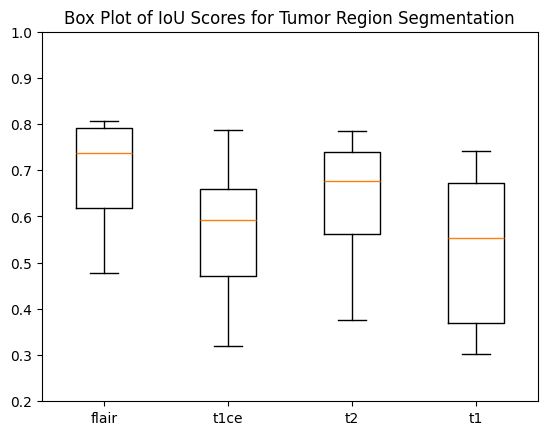

In [174]:
ious_tr = [flair_tr_iou, t1ce_tr_iou, t2_tr_iou, t1_tr_iou]

plt.boxplot(ious_tr)
plt.title("Box Plot of IoU Scores for Tumor Region Segmentation")
plt.xticks([1, 2, 3, 4], ['flair', 't1ce', 't2', 't1'])
plt.ylim(0.2, 1.0)
plt.show()

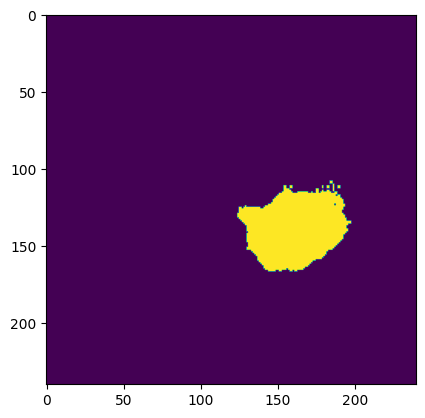

In [107]:
plt.imshow(mask[:,:,160])

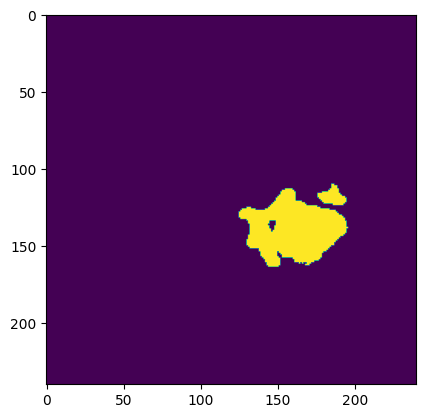

In [108]:
plt.imshow(label_tr[:,:,160])

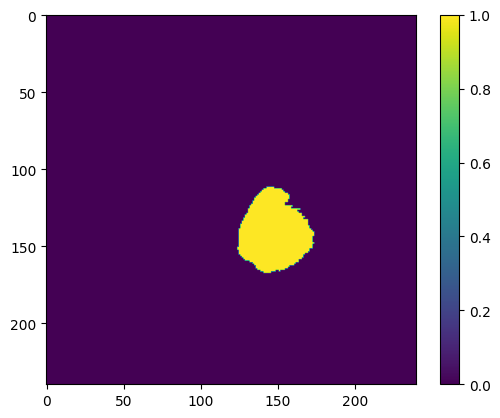

In [135]:
plt.imshow(label[:,170,:])
plt.colorbar()

In [123]:
np.unique(label)

array([  0,  51, 102, 205], dtype=uint8)

In [ ]:
label = utils.padtocube(utils.load3dmatrix('images/label_14'))
plt.imshow(label[:,160,:])
plt.colorbar()

In [ ]:
plt.hist(label.flatten(), bins=256)
plt.yscale('log')

# Num Transforms data quantification

In [460]:
# Liver
dice_liver = []
target_list = ['ortho','cubic','ico','dodeca']

for x in [5,8,10]:
    for t in target_list:
        mask = utils.padtocube(utils.load_mrc('outputs/vol_%d_%s_mask.mrc' % (x, t)))
        label = utils.padtocube(utils.load3dmatrix('images/label_%d' % (x)))
        

        label_organ = np.where(np.abs(label - 51) < 2, 1, 0)
            
        dice_sc = dice_score(mask, label_organ)
        dice_liver.append([t,dice_sc])

In [588]:
dfl = pd.DataFrame(dice_liver)
dfl = dfl.groupby(0).mean().reset_index()
dfl

,0,1
0,cubic,0.915865
1,dodeca,0.872038
2,ico,0.896078
3,ortho,0.908712


In [589]:
# tumor + edema
dice_tr = []
target_list = ['ortho','cubic','ico','dodeca']

for x in [207,209,216]:
    for t in target_list:
        mask = utils.padtocube(utils.load_mrc('outputs/brats%d_%s_mask.mrc' % (x, t)))
        label = utils.padtocube(utils.load3dmatrix('images/BraTS2021_00%d_seg' % (x)))
        

        label_tr = np.where(label>0, 1, 0)
            
        dice_sc = dice_score(mask, label_tr)
        dice_tr.append([t,dice_sc])

In [590]:
dftr = pd.DataFrame(dice_tr)
dftr = dftr.groupby(0).mean().reset_index()
dftr

,0,1
0,cubic,0.750172
1,dodeca,0.801316
2,ico,0.842425
3,ortho,0.502681


In [591]:
# tumor only
dice_tu = []
target_list = ['ortho','cubic','ico','dodeca3']

for x in [207]:
    for t in target_list:
        mask = utils.padtocube(utils.load_mrc('outputs/brats%d_t1ce_%s_mask.mrc' % (x, t)))
        label = utils.padtocube(utils.load3dmatrix('images/BraTS2021_00%d_seg' % (x)))
        

        label_tr = np.where(np.where(label == 51, 1, 0) + np.where(label == 205, 1, 0), 1,0)
            
        dice_sc = dice_score(mask, label_tr)
        dice_tu.append([t,dice_sc])

In [592]:
dftumor = pd.DataFrame(dice_tu)
dftumor

,0,1
0,ortho,0.660749
1,cubic,0.549549
2,ico,0.861969
3,dodeca3,0.843722


In [593]:
utils.save_mrc(label_tr, 'brats207_t1ce_tumor.mrc')

In [594]:
label = utils.padtocube(utils.load3dmatrix('images/label_8'))
label_organ = np.where(np.abs(label - 51) < 2, 1, 0)
utils.save_mrc(label_organ, 'btcv_vol_8_liver.mrc')

In [618]:
idx = [1,3,2,0]
# idx = [0,1,2,3]

dfl[2] = (np.array([468, 521, 682, 1271])[idx]//3)
dftr[2] = np.array([464, 438, 666, 1088])[idx]//3
dftumor[2] = np.array([132,149,249,664])[idx]

In [619]:
dfl[0] = [4,10,6,3]
dftr[0] = [4,10,6,3]
dftumor[0] = [4,10,6,3]

In [620]:
dfl

,0,1,2
0,4,0.915865,173
1,10,0.872038,423
2,6,0.896078,227
3,3,0.908712,156


In [611]:
dftr

,0,1,2
0,4,0.750172,292
1,10,0.801316,724
2,6,0.842425,444
3,3,0.502681,308


In [628]:
724/423 * 200

342.31678486997635

In [612]:
dftumor

,0,1,2
0,4,0.660749,298
1,10,0.549549,1328
2,6,0.861969,498
3,3,0.843722,264


In [613]:
from matplotlib.lines import Line2D

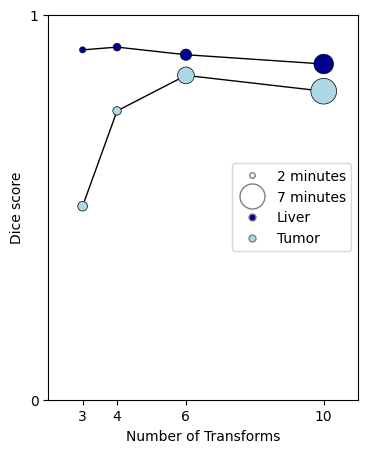

In [631]:
fig, ax = plt.subplots(1,1, figsize=(4,5))
sns.lineplot(ax=ax, data=dfl, x=0, y=1, linewidth=1, c='k')
sns.scatterplot(ax=ax, data=dfl, x=0, y=1, size=2, c='darkblue', markers='o', edgecolors='k', zorder=10, legend=False, sizes=(20,200))

sns.lineplot(ax=ax, data=dftr, x=0, y=1, linewidth=1, c='k')
sns.scatterplot(ax=ax, data=dftr, x=0, y=1, size=2, c='lightblue', markers='o', edgecolors='k', zorder=10, legend=False, sizes=(37,342))
ax.set_ylim(0,1)
ax.set_xlim(2,11)
ax.set_xticks([3,4,6,10])
ax.set_yticks([0.0,1.0])
ax.set_xlabel('Number of Transforms')
ax.set_ylabel('Dice score')

legend_elements = [Line2D([0],[0], marker='o', color='white', markerfacecolor='white', markeredgecolor='gray', label='2 minutes', markersize=4),
                   Line2D([0],[0], marker='o', color='white', markerfacecolor='white', markeredgecolor='gray', label='7 minutes', markersize=18),
                   Line2D([0],[0], marker='o', color='white', markerfacecolor='darkblue', markeredgecolor='gray', label='Liver', markersize=5),
                   Line2D([0],[0], marker='o', color='white', markerfacecolor='lightblue', markeredgecolor='gray', label='Tumor', markersize=5)]
ax.legend(handles = legend_elements, loc='center right')

plt.savefig('score_time_transforms.png',format='png',dpi=500)